# Análise de Dataset de Letras de Música

In [39]:
!pip install vaderSentiment



In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# 1. Imports e parâmetros iniciais
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

dataset_path = '/content/drive/MyDrive/Estudos/lyrics.zip'  # Altere para o seu caminho
N = 100000  # quantidade de linhas da amostra

## Carregando a amostra do dataset

In [42]:
df_sample = pd.read_csv(dataset_path, nrows=N)

# Remover duplicatas
df_sample = df_sample.drop_duplicates(subset=['title', 'artist'])
df_sample = df_sample.drop(columns=['id', 'language_cld3', 'language_ft'])
df_sample.head()

,title,tag,artist,year,views,features,lyrics,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",en


## Função para identificar músicas por padrões nas letras

In [43]:
def contem_estruturas_de_musica(letra):
    if pd.isnull(letra):
        return False
    return bool(re.search(
        r'\[(intro|outro|chorus|refr[aã]o|bridge|verse|coro|solo|interlude|pre-chorus|verso|parte|hook|ponte)\]',
        letra, re.IGNORECASE))

## Identificar músicas em misc e separar das que não são

In [58]:
df_misc = df_sample[df_sample['tag'] == 'misc'].copy()
df_musicas = df_sample[df_sample['tag'] != 'misc'].copy()

# Identificar músicas dentro de misc
df_misc['parece_musica'] = df_misc['lyrics'].apply(contem_estruturas_de_musica)
df_misc_musicas = df_misc[df_misc['parece_musica']]

# Unir tudo
df_todas_musicas = pd.concat([df_musicas, df_misc_musicas], ignore_index=True).drop_duplicates(subset=['title', 'artist', 'year', 'lyrics'])

print(f"Músicas recuperadas de 'misc': {df_misc_musicas.shape[0]}")
print(f"Total de músicas na amostra: {df_todas_musicas.shape[0]}")
df_todas_musicas = df_todas_musicas.drop(columns=['parece_musica'])


Músicas recuperadas de 'misc': 128
Total de músicas na amostra: 96456


,title,tag,artist,year,views,features,lyrics,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",en


# Análises básicas da amostra

Colunas disponíveis: ['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'language', 'parece_musica']

Resumo do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96456 entries, 0 to 96455
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          96453 non-null  object
 1   tag            96456 non-null  object
 2   artist         96456 non-null  object
 3   year           96456 non-null  int64 
 4   views          96456 non-null  int64 
 5   features       96456 non-null  object
 6   lyrics         96456 non-null  object
 7   language       95565 non-null  object
 8   parece_musica  128 non-null    object
dtypes: int64(2), object(7)
memory usage: 6.6+ MB
None
Idiomas presentes na amostra:
language
en     86660
fr      4334
de      2892
pt       498
no       339
es       173
da       157
nl       136
pl        99
it        48
ru        43
tr        36
lt        24
fa        24
sv   

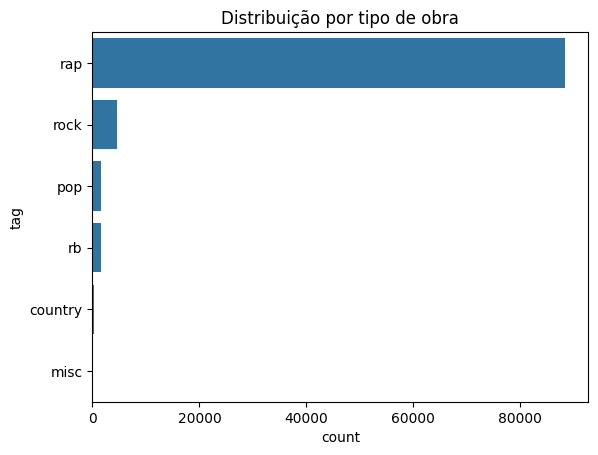


Top 10 artistas:
artist
Lil Wayne         466
Lil B             316
Chamillionaire    309
The Game          292
2Pac              286
Snoop Dogg        279
Tech N9ne         270
50 Cent           262
Nas               258
Gucci Mane        244
Name: count, dtype: int64


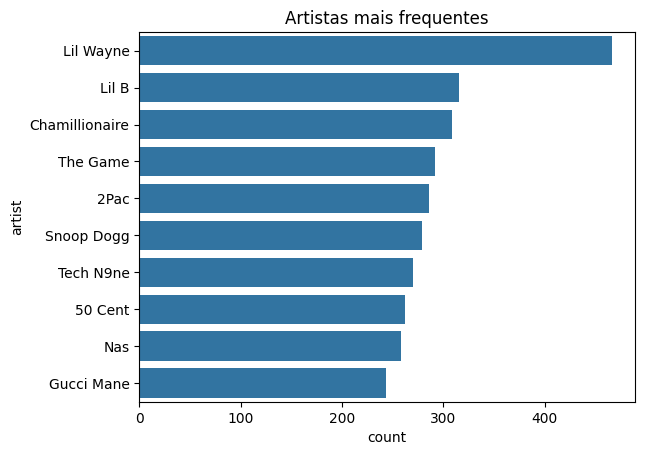

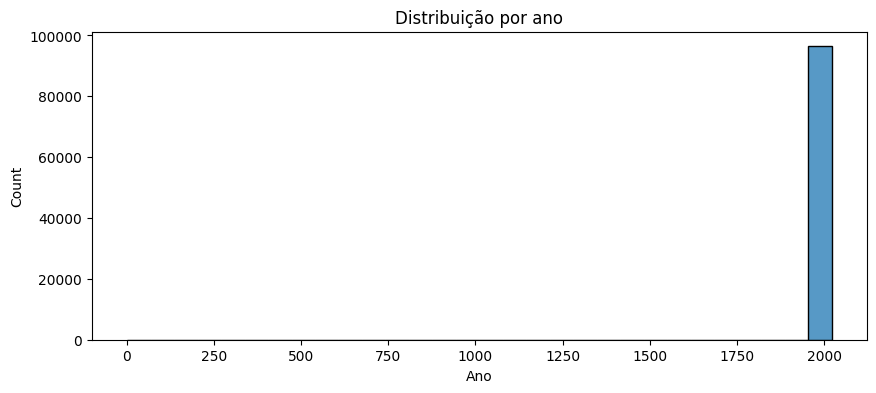

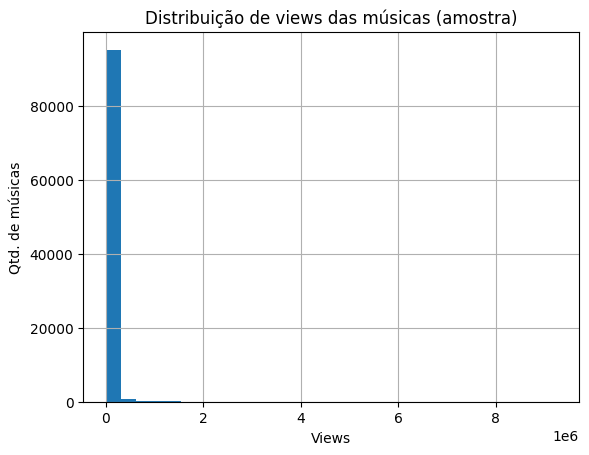

In [45]:
# Informações gerais
print('Colunas disponíveis:', df_todas_musicas.columns.tolist())
print('\nResumo do DataFrame:')
print(df_todas_musicas.info())

# Informações sobre linguagem das músicas
print("Idiomas presentes na amostra:")
print(df_todas_musicas['language'].value_counts())

# Quantidade por tipo de obra
if 'tag' in df_todas_musicas.columns:
    print('\nDistribuição por tipo:')
    print(df_todas_musicas['tag'].value_counts())
    sns.countplot(y='tag', data=df_todas_musicas, order=df_todas_musicas['tag'].value_counts().index)
    plt.title('Distribuição por tipo de obra')
    plt.show()

# Top 10 artistas mais frequentes
print('\nTop 10 artistas:')
print(df_todas_musicas['artist'].value_counts().head(10))
sns.countplot(y='artist', data=df_todas_musicas, order=df_todas_musicas['artist'].value_counts().head(10).index)
plt.title('Artistas mais frequentes')
plt.show()

# Distribuição por ano
plt.figure(figsize=(10,4))
sns.histplot(df_todas_musicas['year'], bins=30, kde=False)
plt.title('Distribuição por ano')
plt.xlabel('Ano')
plt.show()

# Distribuição de views
df_todas_musicas['views'].hist(bins=30)
plt.title('Distribuição de views das músicas (amostra)')
plt.xlabel('Views')
plt.ylabel('Qtd. de músicas')
plt.show()

## Limpeza básica das letras e remoção de nulos

In [46]:
# Função para remover tudo entre colchetes (inclusive os colchetes)
def remove_colchetes(texto):
    if pd.isnull(texto):
        return texto
    # Remove padrões como [qualquer coisa]
    return re.sub(r'\[[^\]]*\]', '', texto)

In [47]:
df_todas_musicas = df_todas_musicas.dropna(subset=['lyrics', 'artist'])
df_todas_musicas['lyrics'] = df_todas_musicas['lyrics'].astype(str).str.replace('\n', ' ').str.lower().str.strip()
# Remover colchetes e o texto entre eles
df_todas_musicas['lyrics'] = df_todas_musicas['lyrics'].apply(remove_colchetes)
df_todas_musicas['lyrics'] = df_todas_musicas['lyrics'].str.replace('  ', ' ', regex=False).str.strip()
df_todas_musicas = df_todas_musicas.reset_index(drop=True)

## Análises exploratórias rápidas (gráficos)

In [48]:
print(df_todas_musicas['artist'].value_counts())
print(df_todas_musicas['year'].value_counts().head(10))
print(df_todas_musicas['tag'].value_counts().head(10))

artist
Lil Wayne          466
Lil B              316
Chamillionaire     309
The Game           292
2Pac               286
                  ... 
Cla$$ic              1
Lady Flow            1
Sawgg-G              1
GawkyYoungPresh      1
The Illist           1
Name: count, Length: 14738, dtype: int64
year
2012    22769
2011    14952
2010     4935
2009     3902
2008     3566
2006     3465
2005     3432
2001     3276
2003     3155
2007     3140
Name: count, dtype: int64
tag
rap        88292
rock        4591
pop         1688
rb          1536
country      221
misc         128
Name: count, dtype: int64


In [49]:
df_todas_musicas.head()

,title,tag,artist,year,views,features,lyrics,language,parece_musica
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","killa cam, killa cam, cam killa cam, killa cam...",en,NaN
1,Can I Live,rap,JAY-Z,1996,468624,{},"yeah, hah, yeah, roc-a-fella we invite you to ...",en,NaN
2,Forgive Me Father,rap,Fabolous,2003,4743,{},maybe cause i'm eatin and these bastards fiend...,en,NaN
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}","ugh, killa! baby! kanye, this that 1970s heron...",en,NaN
4,Fly In,rap,Lil Wayne,2005,78271,{},"so they ask me ""young boy what you gon' do the...",en,NaN


## Análise de sentimento com VADER

---



- Score contínuo
- Classificação precisa (threshold ±0.5)

In [50]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(texto):
    if pd.isnull(texto) or texto.strip() == '':
        return None
    return analyzer.polarity_scores(texto)['compound']

def get_polaridade_precisa(score):
    if pd.isnull(score):
        return None
    if score >= 0.5:
        return 'positivo'
    elif score <= -0.5:
        return 'negativo'
    else:
        return 'neutro'

df_todas_musicas['sentiment_score'] = df_todas_musicas['lyrics'].apply(get_sentiment_score)
df_todas_musicas['polaridade'] = df_todas_musicas['sentiment_score'].apply(get_polaridade_precisa)
df_todas_musicas.head()

,title,tag,artist,year,views,features,lyrics,language,parece_musica,sentiment_score,polaridade
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","killa cam, killa cam, cam killa cam, killa cam...",en,NaN,-0.9823,negativo
1,Can I Live,rap,JAY-Z,1996,468624,{},"yeah, hah, yeah, roc-a-fella we invite you to ...",en,NaN,-0.5022,negativo
2,Forgive Me Father,rap,Fabolous,2003,4743,{},maybe cause i'm eatin and these bastards fiend...,en,NaN,-0.2530,neutro
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}","ugh, killa! baby! kanye, this that 1970s heron...",en,NaN,-0.9850,negativo
4,Fly In,rap,Lil Wayne,2005,78271,{},"so they ask me ""young boy what you gon' do the...",en,NaN,-0.9578,negativo


## Evolução da polaridade de um artista ao longo do tempo


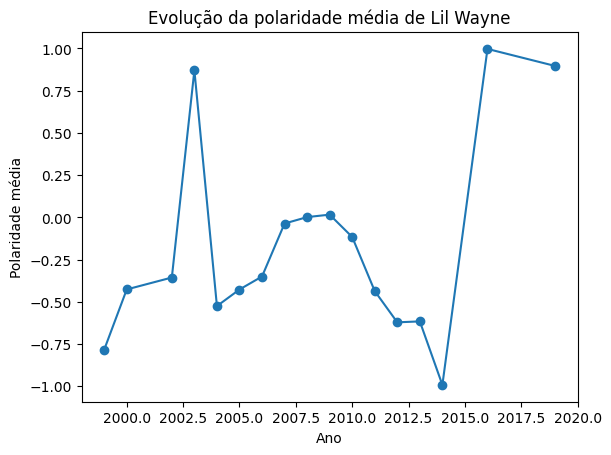

In [51]:
artista_exemplo = df_todas_musicas['artist'].value_counts().index[0]  # artista mais frequente
artista_df = df_todas_musicas[df_todas_musicas['artist'] == artista_exemplo]
polaridade_ano = artista_df.groupby('year')['sentiment_score'].mean()
plt.plot(polaridade_ano.index, polaridade_ano.values, marker='o')
plt.title(f'Evolução da polaridade média de {artista_exemplo}')
plt.xlabel('Ano')
plt.ylabel('Polaridade média')
plt.show()

## Artistas com maior variação de polaridade ao longo do tempo

Top 10 artistas com maior variação de polaridade ao longo do tempo:


,min,max,var_range
artist,,,
Prince,-0.99980,0.99980,1.9996
Lil Jon,-0.99970,0.99960,1.9993
Olivia,-0.99980,0.99890,1.9987
Demrick,-0.99970,0.99890,1.9986
T-Pain,-0.99950,0.99860,1.9981
Matlock,-0.99990,0.99810,1.9980
Bizzy Bone,-0.99830,0.99970,1.9980
Nicole Scherzinger,-0.99940,0.99860,1.9980
Scott Bradlee's Postmodern Jukebox,-0.99950,0.99820,1.9977


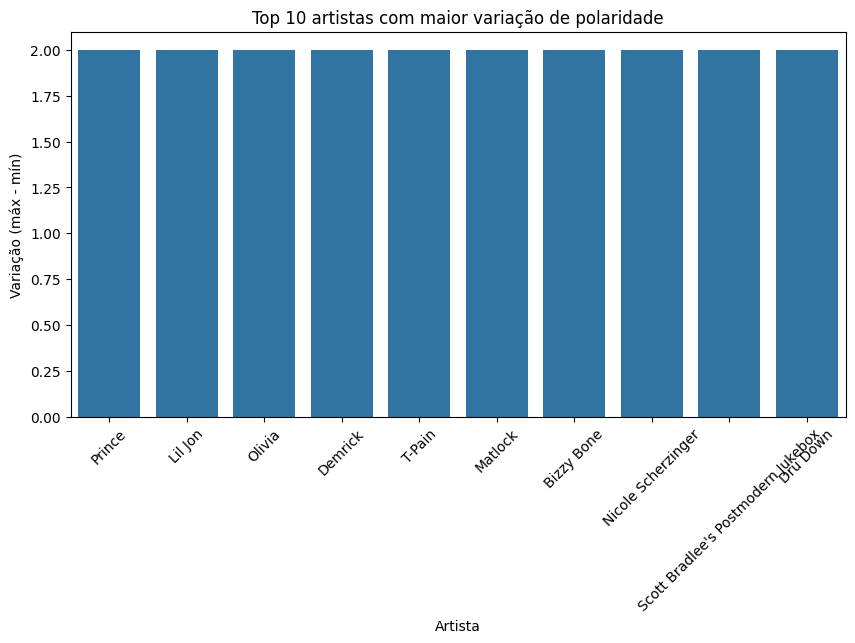

In [52]:
# Calcula o desvio da polaridade média por artista ao longo dos anos
var_por_artista = df_todas_musicas.groupby(['artist', 'year'])['sentiment_score'].mean().reset_index()
var_agg = var_por_artista.groupby('artist')['sentiment_score'].agg(['min', 'max'])
var_agg['var_range'] = var_agg['max'] - var_agg['min']
top_var = var_agg.sort_values('var_range', ascending=False).head(10)
print('Top 10 artistas com maior variação de polaridade ao longo do tempo:')
display(top_var)
# Visualização
plt.figure(figsize=(10,5))
sns.barplot(x=top_var.index, y=top_var['var_range'])
plt.title('Top 10 artistas com maior variação de polaridade')
plt.ylabel('Variação (máx - mín)')
plt.xlabel('Artista')
plt.xticks(rotation=45)
plt.show()

## Relação entre polaridade da música e views

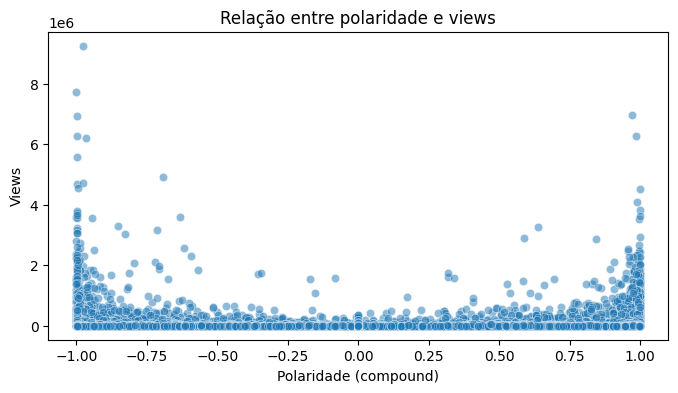

Correlação entre polaridade e views: 0.019


In [53]:
if 'views' in df_todas_musicas.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x='sentiment_score', y='views', data=df_todas_musicas, alpha=0.5)
    plt.title('Relação entre polaridade e views')
    plt.xlabel('Polaridade (compound)')
    plt.ylabel('Views')
    plt.show()
    # Correlação
    corr = df_todas_musicas[['sentiment_score', 'views']].corr().iloc[0,1]
    print(f'Correlação entre polaridade e views: {corr:.3f}')
else:
    print('Coluna "views" não encontrada no DataFrame.')

# Visualização geral dos resultados

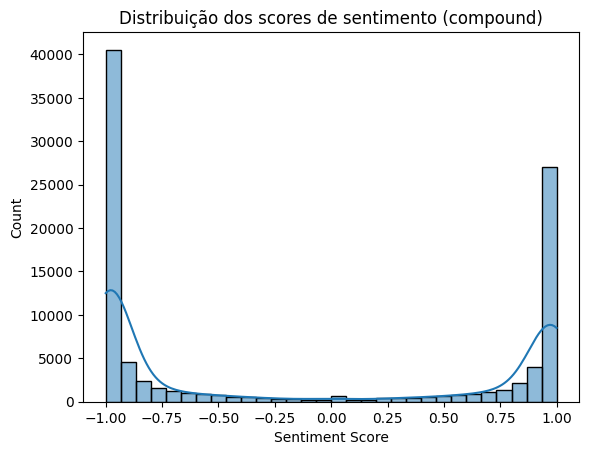

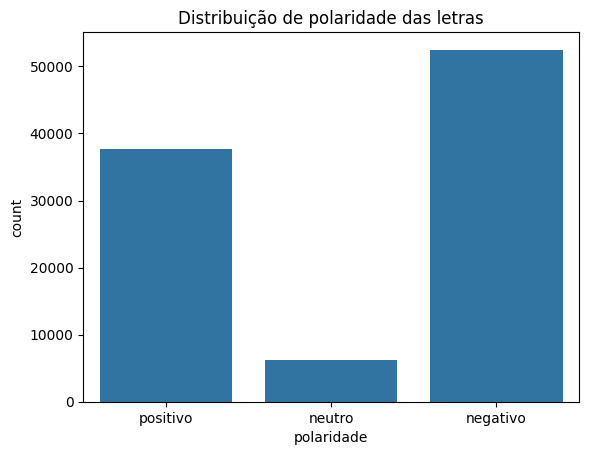

In [54]:
sns.histplot(df_todas_musicas['sentiment_score'], bins=30, kde=True)
plt.title('Distribuição dos scores de sentimento (compound)')
plt.xlabel('Sentiment Score')
plt.show()

sns.countplot(x='polaridade', data=df_todas_musicas, order=['positivo', 'neutro', 'negativo'])
plt.title('Distribuição de polaridade das letras')
plt.show()

# Exemplos de letras com sentimentos extremos

In [55]:
print('Letra mais positiva:')
display(df_todas_musicas.loc[df_todas_musicas['sentiment_score'].idxmax()][['title', 'artist', 'year', 'lyrics', 'sentiment_score']])

print('Letra mais negativa:')
display(df_todas_musicas.loc[df_todas_musicas['sentiment_score'].idxmin()][['title', 'artist', 'year', 'lyrics', 'sentiment_score']])

Letra mais positiva:


,1699
title,So Fresh So Clean
artist,OutKast
year,2001
lyrics,"ain't nobody dope as me; i'm just so fresh, so..."
sentiment_score,1.0


Letra mais negativa:


,14474
title,Fuck Em
artist,David Banner
year,2003
lyrics,(hahaha) yo yo (bone crusher) ya'll know what ...
sentiment_score,-1.0
